In [83]:
#for calculating cnormalization of hubs and authority scores
import math
#for plotting graph
from matplotlib import pyplot as plt

In [84]:
iterations = 4

In [85]:
vertices = ['A', 'B', 'C', 'D','E']
num_vertices = 5

In [86]:
adjacency_matrix = [
    [1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1],
    [1, 0, 0, 0, 0],
    [1, 0, 0, 0, 1]
] #1 indicates directional relationship between vertices

In [87]:
#storing the vertices with outgoing edges
outbound_vertices = [[] for _ in range(num_vertices)]

for i in range(num_vertices) :
    for j in range(num_vertices) :
        if adjacency_matrix[i][j] == 1 :
            outbound_vertices[i].append(j)

outbound_vertices

[[0], [0, 2, 4], [0, 3, 4], [0], [0, 4]]

In [88]:
#storing the vertices with incoming edges
inbound_vertices = [[] for _ in range(num_vertices)]

for i in range(num_vertices) :
    for j in range(num_vertices) :
        if adjacency_matrix[j][i] == 1 :
            inbound_vertices[i].append(j)

inbound_vertices

[[0, 1, 2, 3, 4], [], [1], [2], [1, 2, 4]]

In [89]:
#initializing hub and authority scores 1 for all vertices 
authority_scores = [1] * num_vertices
hub_scores = [1] * num_vertices

In [90]:
for itr in range(iterations) :
    old_authority_scores = authority_scores[:]
    old_hub_scores = hub_scores[:]
   #updating authority and hub scores
    for i in range(num_vertices) :
        authority_scores[i] = sum([old_hub_scores[j] for j in inbound_vertices[i]])
        hub_scores[i] = sum([old_authority_scores[j] for j in outbound_vertices[i]])
    #normalizing scores
    a_normal = math.sqrt(sum([i**2 for i in authority_scores]))
    h_normal = math.sqrt(sum([i**2 for i in hub_scores]))
    for i in range(num_vertices) :
        authority_scores[i] = authority_scores[i] / a_normal
        hub_scores[i] = hub_scores[i] / h_normal

In [91]:
#Authority scores
print(f"The Authority scores of the nodes after {iterations} iterations : ")
for i in range(num_vertices) :
    print(vertices[i], " : ", authority_scores[i])

The Authority scores of the nodes after 4 iterations : 
A  :  0.7668945054590078
B  :  0.0
C  :  0.2013098076829896
D  :  0.2013098076829896
E  :  0.5751708790942559


In [92]:
#Hub Scores
print(f"The Hub scores of the nodes after {iterations} iterations : ")
for i in range(num_vertices) :
    print(vertices[i], " : ", hub_scores[i])

The Hub scores of the nodes after 4 iterations : 
A  :  0.28010687597551287
B  :  0.5524330053961504
C  :  0.5524330053961504
D  :  0.28010687597551287
E  :  0.4824062864022721


#### Q1.b)  Inbuilt HITS algorithm
### Using NetworkX library

In [93]:
import networkx as nx

In [94]:
#using Directed Graph
graph_1 = nx.DiGraph()

In [95]:
#Adding nodes to the graph
graph_1.add_nodes_from(vertices)

In [96]:
graph_1.add_edges_from([('A','A'),('B','A'),('B','C'),('B','E'),('C','A'),('C','D'),('C','E'),('D','A'),('E','A'),('E','E')])

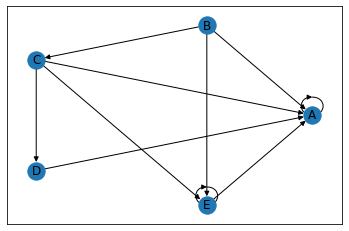

In [97]:
#Plotting generated graph
nx.draw_networkx(graph_1, pos=nx.circular_layout(graph_1), arrows=True, with_labels=True)
plt.show()

In [98]:
#using hits function to get HITS huubs and authorities scores
hub_scores_networkx_1, authority_scores_networkx_1 = nx.hits(graph_1, normalized = True)

In [99]:
#creating authority scores dictionary and storing scores
print("The Authority scores of the nodes using Networkx library : ")
for key, v in authority_scores_networkx_1.items() :
    print(key, " : ", v)

The Authority scores of the nodes using Networkx library : 
A  :  0.4428026084897245
B  :  0.0
C  :  0.1143947830205508
D  :  0.11439478302055077
E  :  0.3284078254691738


In [100]:
#creating hub scores dictionary and storing values
print("The Hub scores of the nodes using Networkx library : ")
for key, value in hub_scores_networkx_1.items() :
    print(key, " : ", value)

The Hub scores of the nodes using Networkx library : 
A  :  0.1291713066130293
B  :  0.25834261322605867
C  :  0.2583426132260586
D  :  0.1291713066130293
E  :  0.22497216032182416
